HU Extension Assignment 05 E89 Deep Learning
===
Due by 11:59 AM EST on Saturday, 03/03/208


Problem 1.
---
Consider Jupyter Notebook 3.6-classifying-newswires.ipynb analyzing classification of Reuters newswires into 46 classes. Consider the model used in the notebook:
```python
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

```

Determine the optimal number of epochs by training the model with one training set of 7982 samples and one validation set of 1000 samples.
Determine the accuracy of the model when trained with such optimal number of epochs. (35%)



In [52]:
import keras
print(keras.__version__)

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print("Training data: {}".format(len(train_data)))
print("Testing data: {}".format(len(test_data)))

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print("Results {}".format(results))


2.1.4
Training data: 8982
Testing data: 2246
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 288us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 126us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.4581 - acc:

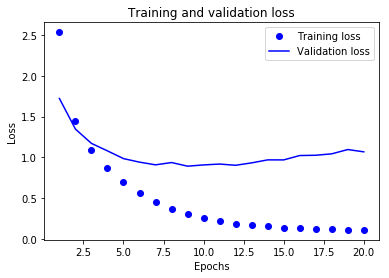

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_loss(history, plot_title='Training and validation loss'):
    plt.clf()
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(plot_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_loss(history)

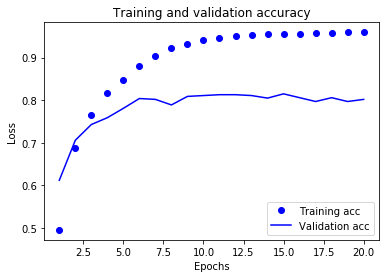

In [54]:
def plot_acc(history, plot_title='Training and validation accuracy'):
    plt.clf()   # clear figure
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(plot_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
plot_acc(history)

Conclusion:
---
As observed on the graph for loss and accuracy, our model start to over fit around 5 to 10 epoch, where loss and accuracy over validation set start deviate from those of the training set. Therefore, __8__ is chosen as a 'optimal' value for epoch.

Problem 2. 
---
Run the above model with the optimal number of epochs. Determine the accuracy of the model using 4 fold validation. Model accuracy should be considered the average accuracy of all 4 training runs with one of 4 validation sets. Compare this accuracy the accuracy obtain in Problem 1.
(35%)

In [55]:
# Model builder
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [56]:
# 4 fold validation
k = 4
num_val_samples = len(x_train) // k
num_epochs = 8  # optimal epoch from P1
batch_size = 512
all_scores = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = one_hot_train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [one_hot_train_labels[:i * num_val_samples],
         one_hot_train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=batch_size, verbose=0)
     # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [57]:
print("Evaluation results:", all_scores)

Evaluation results: [0.7888641425655255, 0.7795100222982648, 0.7714922048997773, 0.7790645879998239]


In [58]:
# Average accuracy
np.mean(all_scores)

0.7797327394408479

Compare with P1
---
Accuracy from P1 was 0.778717720444884 where here we got 0.7797327394408479. 

Problem 3. 
---
Consider the model in Problem 1. Examine the effect of L2 regularization on the optimal number of epochs. Perform experiments with the Lambda value of 0.001, 0,005 and 0.0005. Present the dependence of the optimal number of epochs on the varying regularization parameter.
(30%)


In [59]:
from keras import regularizers

def build_model_with_regularizer(lmd):
    model = models.Sequential()
    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(lmd),
                           activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(lmd),
                           activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

epoch = 20
batch_size = 512
results = {}
for lmd in [0.001, 0.005, 0.0005]:
    model = build_model_with_regularizer(lmd)
    x_val = x_train[:1000]
    partial_x_train = x_train[1000:]

    y_val = one_hot_train_labels[:1000]
    partial_y_train = one_hot_train_labels[1000:]


    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=epoch,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        verbose = 0)

    evaluation = model.evaluate(x_test, one_hot_test_labels, verbose = 0)
    print("Results with L2 regularizer where lambda = {}, [loss, acc] {}".format(lmd, evaluation))
    results[lmd] = history

Results with L2 regularizer where lambda = 0.001, [loss, acc] [1.1569314682366905, 0.786286731967943]
Results with L2 regularizer where lambda = 0.005, [loss, acc] [1.4201978696634594, 0.7693677649154052]
Results with L2 regularizer where lambda = 0.0005, [loss, acc] [1.13557477731951, 0.7867319679430098]


Training and Validation loss & accuracy with L2 regularizer where lambda = 0.0005


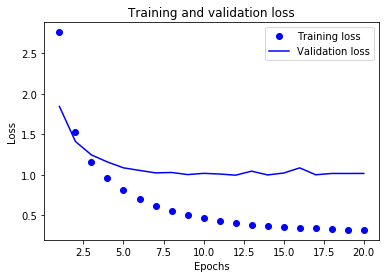

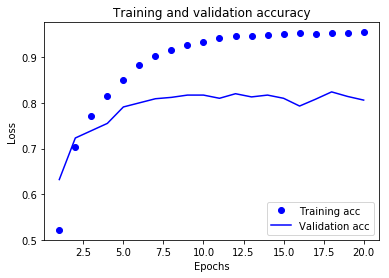

In [60]:
items = list(results.items())
def plot_next(items):
    lmd, history = items.pop()
    print("Training and Validation loss & accuracy with L2 regularizer where lambda =", lmd)
    plot_loss(history)
    plot_acc(history)
    
# Plot loss and acc for next lambda
plot_next(items)

Lambda 0.0005
---
Optimal epoch count accoring to graphs above is around 6.

Training and Validation loss & accuracy with L2 regularizer where lambda = 0.005


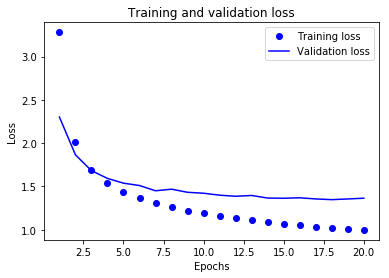

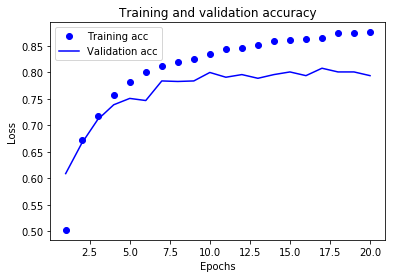

In [61]:
# Plot loss and acc for next lambda
plot_next(items)

Lambda 0.005
---
Optimal epoch count accoring to graphs above is around 9.

Training and Validation loss & accuracy with L2 regularizer where lambda = 0.001


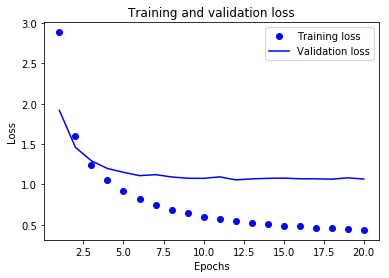

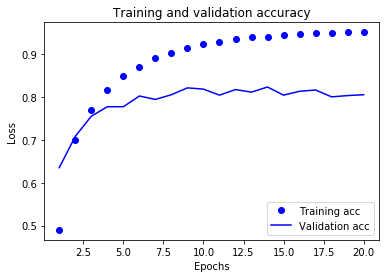

In [62]:
# Plot loss and acc for next lambda
plot_next(items)

Lambda 0.001
---
Optimal epoch count accoring to graphs above is around 6.